Index(['X_meters', 'Y_meters', 'Signal_Strength_dBm'], dtype='object')


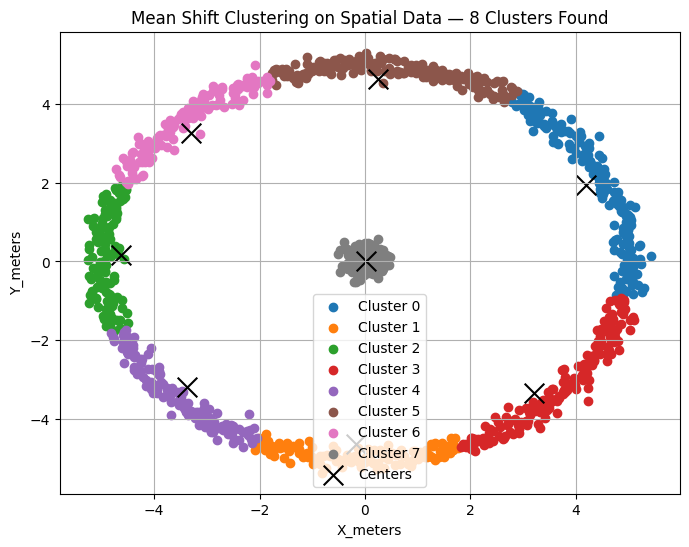

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import MeanShift, estimate_bandwidth
import numpy as np

# 1. Load dataset from CSV
df = pd.read_csv("Synthetic Mean Shift Cluster Dataset - Auxin Security - synthetic_cybersecurity_user_behavior.csv")

# 2. Verify column names
print(df.columns)

# 3. Extract features for clustering (using X_meters and Y_meters)
X = df[["X_meters", "Y_meters"]].values

# 4. Estimate a good bandwidth for Mean Shift
bandwidth = estimate_bandwidth(X, quantile=0.2, n_samples=400)

# 5. Apply Mean Shift clustering
ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
ms.fit(X)
labels = ms.labels_
cluster_centers = ms.cluster_centers_
n_clusters = len(np.unique(labels))

# 6. Add labels to the DataFrame
df["Cluster"] = labels

# 7. Plot results
plt.figure(figsize=(8, 6))
for k in range(n_clusters):
    cluster = df[df["Cluster"] == k]
    plt.scatter(cluster["X_meters"], cluster["Y_meters"], label=f'Cluster {k}')

# Plot cluster centers
plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1],
            c='black', s=200, marker='x', label='Centers')

plt.title(f'Mean Shift Clustering on Spatial Data — {n_clusters} Clusters Found')
plt.xlabel("X_meters")
plt.ylabel("Y_meters")
plt.legend()
plt.grid(True)
plt.show()